In [ ]:
# general
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
from scipy.sparse.linalg import svds

# our implementations
from bksvd import *
from DistMatrix import L1DistMatrix
from DistMatrix import L2_2DistMatrix

# utils
from scipy.spatial import distance_matrix
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist
from time import time

## Gaussian mixture

In [ ]:
def make_data(size, metric='l1'):
  # Create dataset
    points = np.random.normal(size=size)
    points = np.vstack((points, np.random.normal(size=size) + 5))
    points = np.vstack((points, np.random.normal(size=size) - 5))
    points = points.astype('float32')
    print(f'dataset\n type: {points.dtype},\t shape: {points.shape}\n')

  # Create distance matrix
    if metric == 'l1':
        start = time()
        dist = pairwise_distances(points, metric=metric)
    elif metric == 'l2_2':
        start = time()
        dist = cdist(points, points, 'sqeuclidean')
    print(f'dist matrix\n type: {dist.dtype},\t shape: {dist.shape}\n')
    print('seconds for dist matrix building:\t', time() - start)
  
    return points, dist

In [ ]:
n = 8000
d = 50
size = (n, d)
points, dist = make_data(size, metric='l2_2')

dataset
 type: float32,	 shape: (24000, 50)

dist matrix
 type: float64,	 shape: (24000, 24000)

seconds for dist matrix building:	 17.469231843948364


In [ ]:
k = 5
num_iter = 80
block_size = 6

In [ ]:
start = time()
U, S, V = svds(dist, k)
print('seconds for svds:\t', time() - start)

seconds for svds:	 77.34829688072205


In [ ]:
B = L2_2DistMatrix(points)
frob_sci = np.linalg.norm(U @ np.diag(S) @ V - dist)
u, s, v, conv = bksvd_h_conv(B, k, num_iter, block_size, dist, frob_sci)

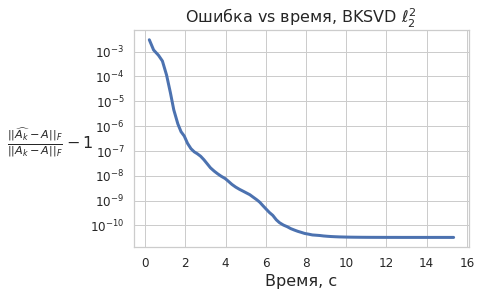

In [ ]:
cumtime = np.array(conv['time']).cumsum()

fig, ax = plt.subplots()
ax.plot(cumtime, conv['error'], linewidth=3)

ax.set_title(r'Ошибка vs время, BKSVD $\ell_2^2$', fontsize=16)
ax.set_xlabel('Время, c', fontsize=16)
ax.set_ylabel(r'$\frac{||\widehat{A_k}-A||_F}{||A_k-A||_F}-1$', fontsize=16, rotation=0)
ax.yaxis.set_label_coords(-0.25, 0.4)
ax.tick_params(labelsize=12)

ax.set_yscale('log')
plt.savefig('errortimel2.svg', bbox_inches='tight')

## MNIST

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
train = mnist['data'].to_numpy()
points = train[:15000, :]

In [ ]:
start = time()
dist = cdist(points, points, 'sqeuclidean')
print(f'dist matrix\n type: {dist.dtype},\t shape: {dist.shape}\n')
print('seconds for dist matrix building:\t', time() - start)

dist matrix
 type: float64,	 shape: (15000, 15000)

seconds for dist matrix building:	 819.4136710166931


In [ ]:
k = 5
num_iter = 7
block_size = 6

In [ ]:
start = time()
Us, Ss, Vs = svds(dist, k)
print('seconds for scipy:\t', time() - start)
frob_sci = np.linalg.norm(Us @ np.diag(Ss) @ Vs - dist)

seconds for scipy:	 11.668715000152588


In [ ]:
A = L2_2DistMatrix(points)
frob_sci = np.linalg.norm(Us @ np.diag(Ss) @ Vs - dist)
u, s, v, conv = bksvd_h_conv(A, k, num_iter, block_size, dist, frob_sci)

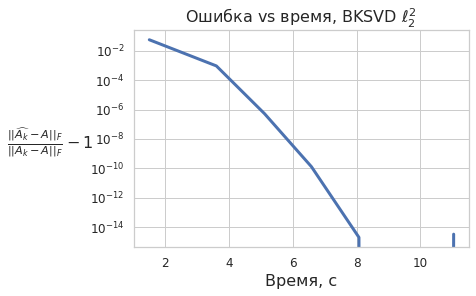

In [ ]:
cumtime = np.array(conv['time']).cumsum()

fig, ax = plt.subplots()
ax.plot(cumtime, conv['error'], linewidth=3)

ax.set_title(r'Ошибка vs время, BKSVD $\ell_2^2$', fontsize=16)
ax.set_xlabel('Время, c', fontsize=16)
ax.set_ylabel(r'$\frac{||\widehat{A_k}-A||_F}{||A_k-A||_F}-1$', fontsize=16, rotation=0)
ax.yaxis.set_label_coords(-0.25, 0.4)
ax.tick_params(labelsize=12)

ax.set_yscale('log')
plt.savefig('l2_mnist.svg', bbox_inches='tight')